In [69]:
# Import libraries for data processing
# -----------------------------------------------------------------------
import pandas as pd  # Pandas for data manipulation and analysis in Python.

# Optional libraries (can be removed if not used):
# -----------------------------------------------------------------------
# Import libraries for web scraping and data manipulation
# from bs4 import BeautifulSoup
# import requests

# Import libraries for web browser automation with Selenium
# from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager

# ChromeDriverManager manages the installation of the Chrome driver

# from selenium.webdriver.common.keys import Keys  # Keys is useful for simulating keyboard events in Selenium.
# from selenium.webdriver.support.ui import Select  # Select is used to interact with <select> elements on web pages.

# Import libraries for pausing execution
# -----------------------------------------------------------------------
# from time import sleep  # Sleep is used to pause the program execution for a number of seconds.

# Configurations
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)  # Set a Pandas option to show all columns of a DataFrame.

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


pd.options.display.max_columns = None

pd.set_option('display.float_format', '{:.2f}'.format)

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind






In [70]:
data = pd.read_csv("files/data_merged.csv")

In [71]:
#data_filtered = data.groupby("Flights Booked")["Education"].sum()

In [72]:
#revisar 
for categoria in data["Education"].unique():
        
        dataframe_filtrado = data[data["Education"] == categoria]
        print(f"Los principales estadísticos de la columna 'Flights Booked' para el {categoria.upper()} son: ")
        display(dataframe_filtrado["Flights Booked"].describe().T)

Los principales estadísticos de la columna 'Flights Booked' para el BACHELOR son: 


count   252567.00
mean         4.11
std          5.22
min          0.00
25%          0.00
50%          1.00
75%          8.00
max         21.00
Name: Flights Booked, dtype: float64

Los principales estadísticos de la columna 'Flights Booked' para el COLLEGE son: 


count   102260.00
mean         4.17
std          5.25
min          0.00
25%          0.00
50%          1.00
75%          8.00
max         21.00
Name: Flights Booked, dtype: float64

Los principales estadísticos de la columna 'Flights Booked' para el MASTER son: 


count   12287.00
mean        4.20
std         5.21
min         0.00
25%         0.00
50%         1.00
75%         8.00
max        21.00
Name: Flights Booked, dtype: float64

Los principales estadísticos de la columna 'Flights Booked' para el HIGH SCHOOL OR BELOW son: 


count   18915.00
mean        4.18
std         5.24
min         0.00
25%         0.00
50%         1.00
75%         8.00
max        21.00
Name: Flights Booked, dtype: float64

Los principales estadísticos de la columna 'Flights Booked' para el DOCTOR son: 


count   17731.00
mean        4.18
std         5.26
min         0.00
25%         0.00
50%         1.00
75%         8.00
max        21.00
Name: Flights Booked, dtype: float64

In [73]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

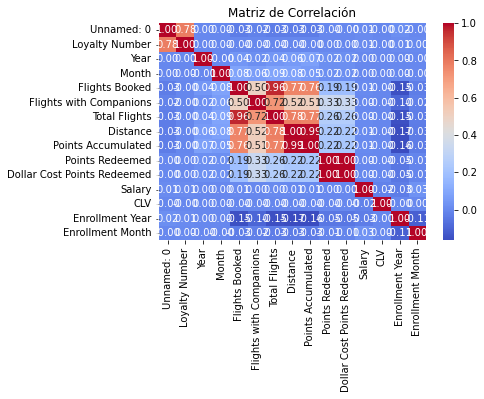

Prueba t para Flights entre Control y Test - p-valor: nan


In [74]:
# Visualizar la matriz de correlación
correlacion_matrix = data.corr()
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Realizar la prueba de chi-cuadrado para evaluar la independencia de dos variables categóricas
#contingency_table = pd.crosstab(data['Flights Booked'], data['Education'])
#chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
#print(f"Prueba de Chi-cuadrado - p-valor: {p_chi2}")

# Realizar una prueba t para comparar las medias de dos grupos (por ejemplo, Control vs. Test)
control_group = data[data['Flights Booked'] == 'Control Campaign']
test_group = data[data['Flights Booked'] == 'Test Campaign']
t_stat, p_ttest = ttest_ind(control_group['Flights Booked'], test_group['Flights Booked'])
print(f"Prueba t para Flights entre Control y Test - p-valor: {p_ttest}")